In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Marksheet.csv")
df.head()

,sr no,Branch,Enrolment No,Name,Roll No,Div,Mentor Name,TEST-1 MARKS,TEST-2 MARKS,TEST-3 MARKS,TEST-4 MARKS
0,1,CE,2.200220e+13,KATHIRIYA VRAJKUMAR ASHVINBHAI,110,A4,UMM,22.5,18.0,22.5,14.5
1,2,CE,2.300220e+13,AGRAVAT SAHIL RAJARAMBHAI,101,A3,SAS,21.5,20.0,19,14
2,3,CE,2.300220e+13,BALAR RAGHUBHAI SURESHBHAI,162,A5,KMS,17.0,20.5,19,19
3,4,CE,2.300220e+13,BALESANA HASSANBHAI YUNUSBHAI,122,A4,UMM,21.0,17.5,9,22
4,5,CE,2.300220e+13,BAMBHROLIYA HIT NARESHBHAI,87,A3,UMS,24.0,22.0,21.5,24


In [2]:
# cleand tahe dataset
# perform total marks calculation
# assign grade on based total marks
# simple linear regression model to predict total marks using only test1 marks 
# 75 to 84.99 grade b
# 65 to 74.99 grade c
# 50 to 64.99 grade d
# 35 to 49.99 grade e
# below 35 grade f
# find m & c
# also find mean square error and r2_score

In [3]:
df.shape

(302, 11)

In [4]:
df.isna().sum()

sr no           0
Branch          0
Enrolment No    0
Name            0
Roll No         0
Div             0
Mentor Name     1
TEST-1 MARKS    0
TEST-2 MARKS    0
TEST-3 MARKS    0
TEST-4 MARKS    0
dtype: int64

In [5]:
df = df.loc[df["TEST-3 MARKS"]!="AB"]

In [6]:
df = df.loc[df["TEST-4 MARKS"]!="AB"]

In [7]:
df['TEST-3 MARKS'] = df['TEST-3 MARKS'].astype('float64')

In [8]:
df['TEST-4 MARKS'] = df['TEST-4 MARKS'].astype('float64')

In [9]:
df["Total"] = df["TEST-1 MARKS"] + df["TEST-2 MARKS"] + df["TEST-3 MARKS"] + df["TEST-4 MARKS"]
df.head()

,sr no,Branch,Enrolment No,Name,Roll No,Div,Mentor Name,TEST-1 MARKS,TEST-2 MARKS,TEST-3 MARKS,TEST-4 MARKS,Total
0,1,CE,2.200220e+13,KATHIRIYA VRAJKUMAR ASHVINBHAI,110,A4,UMM,22.5,18.0,22.5,14.5,77.5
1,2,CE,2.300220e+13,AGRAVAT SAHIL RAJARAMBHAI,101,A3,SAS,21.5,20.0,19.0,14.0,74.5
2,3,CE,2.300220e+13,BALAR RAGHUBHAI SURESHBHAI,162,A5,KMS,17.0,20.5,19.0,19.0,75.5
3,4,CE,2.300220e+13,BALESANA HASSANBHAI YUNUSBHAI,122,A4,UMM,21.0,17.5,9.0,22.0,69.5
4,5,CE,2.300220e+13,BAMBHROLIYA HIT NARESHBHAI,87,A3,UMS,24.0,22.0,21.5,24.0,91.5


In [10]:
df["Grade"] = np.where(df['Total']>85,'A',np.where(df['Total'] >= 75,'B',
                                                  np.where(df['Total'] >= 65,'C',
                                                          np.where(df['Total'] >= 50,'D',
                                                                  np.where(df['Total'] >= 35,'E','F')))))

In [11]:
df.head()

,sr no,Branch,Enrolment No,Name,Roll No,Div,Mentor Name,TEST-1 MARKS,TEST-2 MARKS,TEST-3 MARKS,TEST-4 MARKS,Total,Grade
0,1,CE,2.200220e+13,KATHIRIYA VRAJKUMAR ASHVINBHAI,110,A4,UMM,22.5,18.0,22.5,14.5,77.5,B
1,2,CE,2.300220e+13,AGRAVAT SAHIL RAJARAMBHAI,101,A3,SAS,21.5,20.0,19.0,14.0,74.5,C
2,3,CE,2.300220e+13,BALAR RAGHUBHAI SURESHBHAI,162,A5,KMS,17.0,20.5,19.0,19.0,75.5,B
3,4,CE,2.300220e+13,BALESANA HASSANBHAI YUNUSBHAI,122,A4,UMM,21.0,17.5,9.0,22.0,69.5,C
4,5,CE,2.300220e+13,BAMBHROLIYA HIT NARESHBHAI,87,A3,UMS,24.0,22.0,21.5,24.0,91.5,A


In [12]:
x = df[["TEST-1 MARKS"]]
y = df[["Total"]]

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
m = lr.coef_
print(m)

[[3.53223839]]


In [17]:
c = lr.intercept_
print(c)

[-0.02429667]


In [18]:
y_pred = lr.predict(x_test)
print(y_pred)

[[56.49151752]
 [84.74942462]
 [82.98330542]
 [84.74942462]
 [75.91882865]
 [70.62047107]
 [81.21718623]
 [82.98330542]
 [77.68494784]
 [74.15270946]
 [63.5559943 ]
 [77.68494784]
 [75.91882865]
 [72.38659026]
 [88.281663  ]
 [61.7898751 ]
 [82.98330542]
 [68.85435188]
 [81.21718623]
 [56.49151752]
 [81.21718623]
 [77.68494784]
 [86.51554381]
 [81.21718623]
 [79.45106704]
 [82.98330542]
 [51.19315994]
 [82.98330542]
 [47.66092155]
 [77.68494784]
 [60.02375591]
 [81.21718623]
 [75.91882865]
 [52.95927913]
 [84.74942462]
 [60.02375591]
 [67.08823268]
 [74.15270946]
 [77.68494784]
 [81.21718623]
 [84.74942462]
 [24.70137204]
 [63.5559943 ]
 [63.5559943 ]
 [74.15270946]
 [70.62047107]
 [72.38659026]
 [72.38659026]
 [52.95927913]
 [42.36256397]
 [79.45106704]
 [70.62047107]
 [77.68494784]
 [86.51554381]
 [77.68494784]
 [77.68494784]
 [28.23361043]
 [49.42704075]
 [56.49151752]
 [75.91882865]]


In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2-Score:",r2_score(y_test, y_pred))

MSE: 103.66990257531208
R2-Score: 0.6400451286845531


# Polynomial Linear Regression

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("polylinearregression.csv")
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [29]:
x=df[["Temperature"]]
y=df[["Pressure"]]

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_Poly = poly.fit_transform(x)

In [35]:
print(x_Poly)

[[1.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 2.00e+01 4.00e+02 8.00e+03]
 [1.00e+00 4.00e+01 1.60e+03 6.40e+04]
 [1.00e+00 6.00e+01 3.60e+03 2.16e+05]
 [1.00e+00 8.00e+01 6.40e+03 5.12e+05]
 [1.00e+00 1.00e+02 1.00e+04 1.00e+06]]


In [36]:
lr = LinearRegression()
lr.fit(x_Poly, y)

LinearRegression()

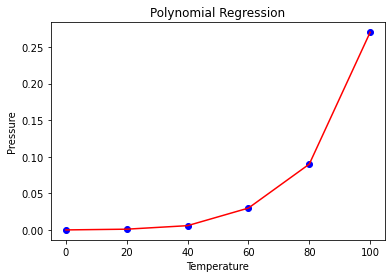

In [38]:
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

# PB-198

In [40]:
df = pd.read_csv("Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [41]:
x=df[["Level"]]
y=df[["Salary"]]

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_Poly = poly.fit_transform(x)

In [43]:
lr = LinearRegression()
lr.fit(x_Poly, y)

LinearRegression()

In [48]:
p= lr.predict(poly.fit_transform([[6.5]]))
print(p)

[[133259.46969697]]


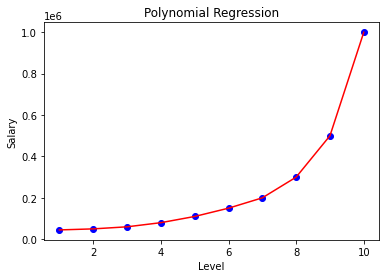

In [45]:
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='red')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# PB-199

In [63]:
# For x = np.arange(0, 30) and y = np.array([3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 
# 135, 151, 160, 169, 179]), apply polynomial regression using scikit learn library and calculate  R squared, coeficient and intercept. 
# Predict the y values for x = np.arange(5). (Don't split data for training/testing)

x = np.arange(0, 30).reshape(-1,1)
y = np.array([3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108,
135, 151, 160, 169, 179])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_Poly = poly.fit_transform(x)

lr = LinearRegression()
lr.fit(x_Poly, y)

m = lr.coef_
print("m:",m)

c = lr.intercept_
print("c:",c)




m: [ 0.          3.38954229 -0.03098624  0.00447358]
c: -3.195869990226825


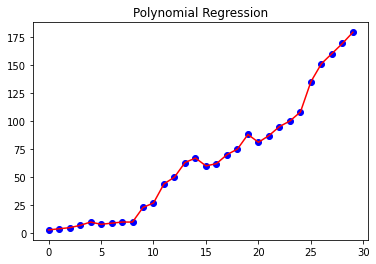

In [60]:
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='red')
plt.title('Polynomial Regression')
plt.show()